In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from matplotlib import cm
import csv
import tidypandas as tp
DFGV=pd.read_csv("Goalies.csv", usecols=['Player','GP','TOI','Shots Against','Saves','SV%','HD Shots Against','HD Saves','HDSV%'])
#print(DFGV)
DFSIT = pd.read_csv("SkaterIndividualstats.csv")
#print(DFSIT)
DFSOIS=pd.read_csv("SkaterOnIcestats.csv")
#print(DFG)
DFRG=pd.read_csv("RookieGoalies.csv")
#print(DFRG)
DFRSIT=pd.read_csv("RookieSkaterOnIce.csv")
#print(DFRSIT)
DFRSOIS=pd.read_csv("RookieSkaterIndividual.csv")
#print(DFRSOIS)

Let's start with the Vezina trophy for the best goalie.

In [2]:
DFGV=pd.read_csv("Goalies.csv", usecols=['Player','GP','TOI','Shots Against','Saves','SV%','HD Shots Against','HD Saves','HDSV%'])

First I will filter out goalies who have fewer than 1000 saves

In [3]:
filtered_DFGV = DFGV[DFGV['Saves'] >1000]
display(filtered_DFGV)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
20,Jake Oettinger,44,2584.833333,1175,1070,0.911,288,228,0.792
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820
43,Jordan Binnington,43,2460.250000,1136,1021,0.899,275,221,0.804


Next I'll sort by the High Danger Save Percentages

In [4]:
HDOrder=filtered_DFGV.sort_values(by=['HDSV%'], ascending=[0])
display(HDOrder)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
47,Juuse Saros,45,2598.666667,1252,1124,0.898,337,277,0.822
44,Sam Montembeault,46,2567.866667,1232,1108,0.899,357,293,0.821
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820
49,Elvis Merzlikins,40,2408.183333,1154,1035,0.897,319,261,0.818
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818


One last order that I'm going to perform is to order goalies by save percentage before doing further filtering

In [5]:
SVOrder=filtered_DFGV.sort_values(by=['SV%'], ascending=[0])
display(SVOrder)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
20,Jake Oettinger,44,2584.833333,1175,1070,0.911,288,228,0.792
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820
43,Jordan Binnington,43,2460.250000,1136,1021,0.899,275,221,0.804


Now I'm going to run another filter on the data. This time I will set a filter that clears out anyone who has a High Danger Save Percentage lower than 80%.

In [6]:
HDSVFilter=filtered_DFGV[filtered_DFGV['HDSV%']>0.8]
display(HDSVFilter)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820
43,Jordan Binnington,43,2460.250000,1136,1021,0.899,275,221,0.804
44,Sam Montembeault,46,2567.866667,1232,1108,0.899,357,293,0.821


Next is a second filter to filter out those who have a saver percentage beneath 90%.

In [7]:
SVFilter=HDSVFilter[HDSVFilter['SV%']>0.9]
display(SVFilter)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820


The next two reorderings will be first by HDSV percentage and then by SV percentage

In [8]:
HDSVF=SVFilter.sort_values(by=['HDSV%'], ascending=[0])
display(HDSVF)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816


In [9]:
SVFF=SVFilter.sort_values(by=['SV%'], ascending=[0])
display(SVFF)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
4,Connor Hellebuyck,46,2771.733333,1262,1170,0.927,293,253,0.863
9,Andrei Vasilevskiy,48,2837.050000,1335,1232,0.923,317,271,0.855
11,Mackenzie Blackwood,44,2504.983333,1229,1125,0.915,309,260,0.841
12,Filip Gustavsson,40,2348.033333,1190,1088,0.914,274,229,0.836
13,Joey Daccord,41,2365.866667,1167,1066,0.913,285,233,0.818
23,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
30,Igor Shesterkin,44,2493.083333,1263,1144,0.906,358,295,0.824
37,Ilya Sorokin,45,2575.083333,1237,1117,0.903,322,264,0.820


In [10]:
SAL=SVFilter.sort_values(by=['Shots Against'], ascending=[0])

Firstly, I will plot players and their total number of shots against.

<function matplotlib.pyplot.show(close=None, block=None)>

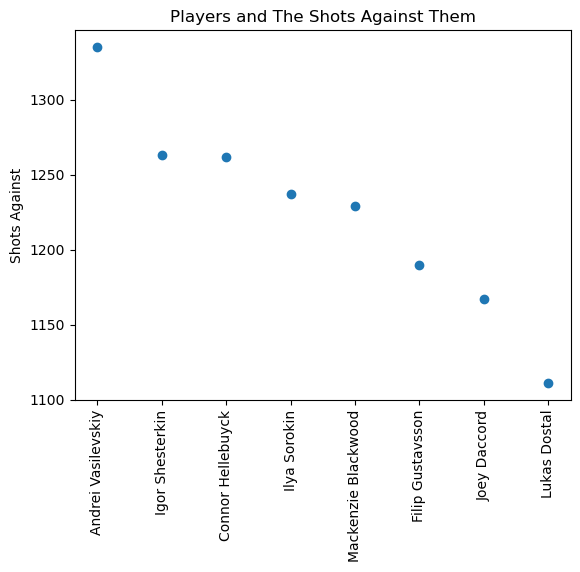

In [11]:
plt.scatter(SAL['Player'],SAL['Shots Against'])
plt.xticks(SAL['Player'],rotation=90)
plt.ylabel('Shots Against')
plt.title('Players and The Shots Against Them')
plt.show

Next I will plot players and their save percentages and high danger save percentages.

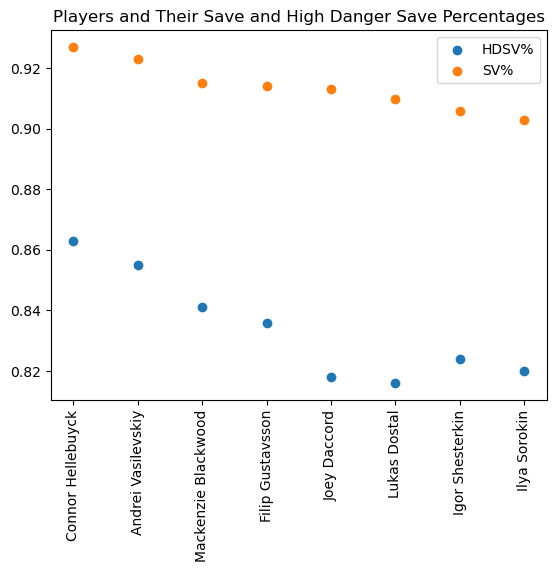

In [12]:
HDSVLL=SVFF.loc[:,'HDSV%']
SVFFL=SVFF.loc[:,'SV%']
GP=SVFF.loc[:,'Player']
P1=plt.scatter(GP,HDSVLL)
P2=plt.scatter(GP,SVFFL)
plt.xticks(GP,rotation=90)
plt.legend([P1,P2],['HDSV%','SV%'])
plt.title('Players and Their Save and High Danger Save Percentages')
plt.show()

# From these plots and the tables generated in filtering and ordering the data I will create my ticket for the Vezina Trophy.
# My ticket is as follows:
# 1) Connor Hellebuyck
# 2) Andrei Vasilevskiy
# 3) Igor Shesterkin
# 4) Mackenzie Blackwood
# 5) Filip Gustavsson


The next trophy is the James Norris Memorial trophy for the best overall defenseman for the position.

The first thing I plan to do is run a filter on the data. For defesnsive players and other pertinent information like GP, TOI, CF, CA, CF% and PDO as metrics for their performance.

In [13]:
DFRSOIS=pd.read_csv("SkaterOnIcestats.csv",usecols=['Player','Position','GP','TOI','CF','CA','CF%','PDO'])
DFilter=DFRSOIS.sort_values(by=['Position'])
D=DFilter[DFilter['Position']=='D']
display(D)

,Player,Position,GP,TOI,CF,CA,CF%,PDO
820,Jamie Oleksiak,D,61,1157.750000,927,1500,38.20,0.990
543,Rasmus Andersson,D,60,1447.283333,1471,1673,46.79,0.961
560,Damon Severson,D,57,1122.416667,1007,1161,46.45,1.000
559,David Jiricek,D,12,145.416667,125,144,46.47,1.017
545,Dante Fabbro,D,47,971.250000,944,1075,46.76,0.999
...,...,...,...,...,...,...,...,...
370,Rasmus Sandin,D,61,1162.483333,1114,1076,50.87,1.028
372,Noah Hanifin,D,60,1278.133333,1309,1265,50.85,0.974
457,Neal Pionk,D,61,1355.500000,1316,1377,48.87,1.031
1,Samuel Bolduc,D,1,5.933333,7,2,77.78,0.000


Next I will run a series of filters to filter for time on the ice and games played.

In [14]:
DPFilter=D[D['GP']>60]
TOIDFilter=DPFilter[DPFilter['TOI']>1300]
display(TOIDFilter)

,Player,Position,GP,TOI,CF,CA,CF%,PDO
659,Dylan DeMelo,D,61,1313.350000,1112,1411,44.07,1.033
633,Colton Parayko,D,61,1455.716667,1222,1527,44.45,0.994
813,Cody Ceci,D,63,1362.033333,1081,1723,38.55,0.999
758,Alex Vlasic,D,61,1444.850000,1093,1564,41.14,1.008
761,Mario Ferraro,D,62,1302.216667,1083,1567,40.87,0.966
611,Travis Sanheim,D,61,1496.050000,1303,1588,45.07,0.984
285,Jaccob Slavin,D,61,1323.950000,1411,1272,52.59,0.990
270,Morgan Rielly,D,61,1315.700000,1416,1258,52.95,0.998
167,Erik Karlsson,D,63,1466.800000,1745,1407,55.36,0.979
148,Brent Burns,D,61,1302.533333,1533,1214,55.81,0.973


I will reorder based on the total time on the ice that players are getting.

In [15]:
TOIDOrder=TOIDFilter.sort_values(by=['TOI'],ascending=[0])
display(TOIDOrder)

,Player,Position,GP,TOI,CF,CA,CF%,PDO
127,Cale Makar,D,61,1574.800000,1853,1411,56.77,1.011
611,Travis Sanheim,D,61,1496.050000,1303,1588,45.07,0.984
167,Erik Karlsson,D,63,1466.800000,1745,1407,55.36,0.979
633,Colton Parayko,D,61,1455.716667,1222,1527,44.45,0.994
229,John Carlson,D,61,1452.316667,1612,1384,53.81,1.020
758,Alex Vlasic,D,61,1444.850000,1093,1564,41.14,1.008
401,Gustav Forsling,D,62,1418.650000,1467,1464,50.05,1.009
209,Lane Hutson,D,61,1365.283333,1487,1249,54.35,0.992
813,Cody Ceci,D,63,1362.033333,1081,1723,38.55,0.999
457,Neal Pionk,D,61,1355.500000,1316,1377,48.87,1.031


From here I can see that CF and CA values don't directly correlate with time on the ice. From here I will reorder based on the CF% as a value greater than 55% is considered to be the best of the best.

In [16]:
CFOrder=TOIDOrder.sort_values(by=['CF%'],ascending=[0])
display(CFOrder)

,Player,Position,GP,TOI,CF,CA,CF%,PDO
127,Cale Makar,D,61,1574.800000,1853,1411,56.77,1.011
148,Brent Burns,D,61,1302.533333,1533,1214,55.81,0.973
167,Erik Karlsson,D,63,1466.800000,1745,1407,55.36,0.979
209,Lane Hutson,D,61,1365.283333,1487,1249,54.35,0.992
229,John Carlson,D,61,1452.316667,1612,1384,53.81,1.020
270,Morgan Rielly,D,61,1315.700000,1416,1258,52.95,0.998
285,Jaccob Slavin,D,61,1323.950000,1411,1272,52.59,0.990
401,Gustav Forsling,D,62,1418.650000,1467,1464,50.05,1.009
457,Neal Pionk,D,61,1355.500000,1316,1377,48.87,1.031
611,Travis Sanheim,D,61,1496.050000,1303,1588,45.07,0.984


<function matplotlib.pyplot.show(close=None, block=None)>

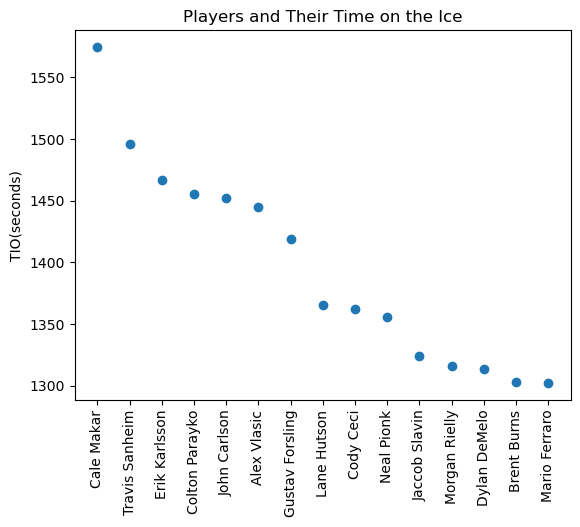

In [17]:
CF=CFOrder.loc[:,'CF']
TOID=CFOrder.loc[:,'TOI']
DP=CFOrder.loc[:,'Player']
Games=CFOrder.loc[:'GP']
plt.scatter(TOIDOrder['Player'],TOIDOrder['TOI'])
plt.xticks(TOIDOrder['Player'],rotation=90)
plt.ylabel('TIO(seconds)')
plt.title('Players and Their Time on the Ice')
plt.show

One final reordering will be based on PDO values as a value greater than one means that players are playing better than expected.

In [18]:
PDOrder=TOIDOrder.sort_values(by=['PDO'],ascending=[0])
PDOD=PDOrder.loc[:,'PDO']
display(PDOrder)

,Player,Position,GP,TOI,CF,CA,CF%,PDO
659,Dylan DeMelo,D,61,1313.350000,1112,1411,44.07,1.033
457,Neal Pionk,D,61,1355.500000,1316,1377,48.87,1.031
229,John Carlson,D,61,1452.316667,1612,1384,53.81,1.020
127,Cale Makar,D,61,1574.800000,1853,1411,56.77,1.011
401,Gustav Forsling,D,62,1418.650000,1467,1464,50.05,1.009
758,Alex Vlasic,D,61,1444.850000,1093,1564,41.14,1.008
813,Cody Ceci,D,63,1362.033333,1081,1723,38.55,0.999
270,Morgan Rielly,D,61,1315.700000,1416,1258,52.95,0.998
633,Colton Parayko,D,61,1455.716667,1222,1527,44.45,0.994
209,Lane Hutson,D,61,1365.283333,1487,1249,54.35,0.992


The following plot will plot players PDO values and their CF values which are their CF percentages divided by 100% to get them to a discrete decimal value scale. I also took the players' time on the ice and divided it by 1000 seconds to get a discrete value for how many seconds they spend on the ice with the basis being 1000 seconds.

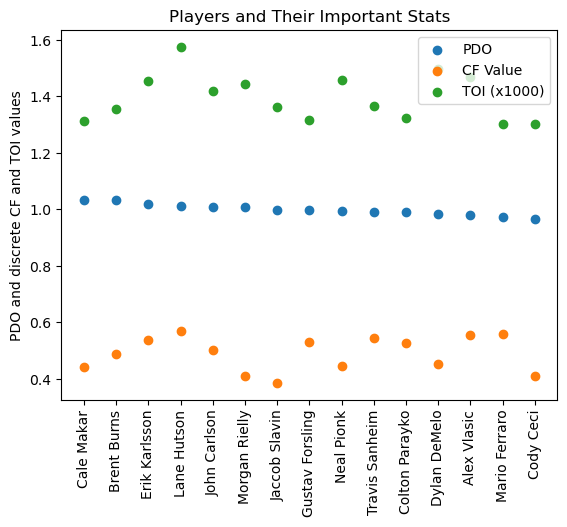

In [19]:
PD1=plt.scatter(DP,PDOD)
PD2=plt.scatter(DP,PDOrder['CF%']/100)
PD3=plt.scatter(DP,PDOrder['TOI']/1000)
plt.xticks(PDOrder['Player'],rotation=90)
plt.legend([PD1,PD2,PD3],['PDO','CF Value','TOI (x1000)'])
plt.ylabel('PDO and discrete CF and TOI values')
plt.title('Players and Their Important Stats')
plt.show()

# Based on the above visualization my ticket for the James Norris Memorial Trophy is as follows:
# 1) Lane Hutson
# 2) Erik Karlsson
# 3) John Carlson
# 4) Alex Vlasic
# 5) Brent Burns

The next trophy is going to be the Calder Memorial Trophy which goes to the best rookie in the league. I'm going to divide the data for rookies between goalies and non-goalies.

First comes the rookie goalies. The data will be reordered to show who has had the most shots taken against them. Then the first filter will be applied. This will be based on games played.

In [20]:
DFRG=pd.read_csv("RookieGoalies.csv",usecols=['Player','GP','TOI','Shots Against','Saves','SV%','HD Shots Against','HD Saves','HDSV%'])
DFRGFilter=DFRG[DFRG['GP']>25]
DFRGSAO=DFRG.sort_values(by=['Shots Against'],ascending=[0])
display(DFRGSAO,DFRGFilter)


,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
16,Ukko-Pekka Luukkonen,43,2448.783333,1163,1040,0.894,302,240,0.795
7,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
13,Stuart Skinner,40,2321.033333,1083,973,0.898,263,211,0.802
6,Dustin Wolf,36,2164.833333,1073,980,0.913,278,235,0.845
5,Logan Thompson,35,2096.033333,985,904,0.918,266,222,0.835
11,Pyotr Kochetkov,37,2196.766667,926,835,0.902,297,254,0.855
8,Joseph Woll,32,1886.366667,918,833,0.907,235,190,0.809
9,Arvid Soderblom,29,1668.533333,895,811,0.906,247,199,0.806
17,Samuel Ersson,34,1890.450000,836,747,0.894,196,159,0.811
15,Dan Vladar,24,1447.983333,677,605,0.894,162,122,0.753


,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
5,Logan Thompson,35,2096.033333,985,904,0.918,266,222,0.835
6,Dustin Wolf,36,2164.833333,1073,980,0.913,278,235,0.845
7,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
8,Joseph Woll,32,1886.366667,918,833,0.907,235,190,0.809
9,Arvid Soderblom,29,1668.533333,895,811,0.906,247,199,0.806
11,Pyotr Kochetkov,37,2196.766667,926,835,0.902,297,254,0.855
13,Stuart Skinner,40,2321.033333,1083,973,0.898,263,211,0.802
16,Ukko-Pekka Luukkonen,43,2448.783333,1163,1040,0.894,302,240,0.795
17,Samuel Ersson,34,1890.450000,836,747,0.894,196,159,0.811


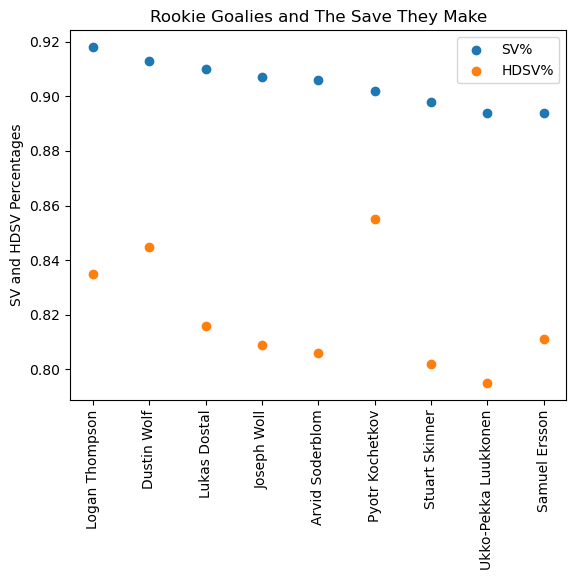

In [21]:
RGSV=DFRGFilter.loc[:,'SV%']
RGHDSV=DFRGFilter.loc[:,'HDSV%']
RGP=DFRGFilter.loc[:,'Player']
PRG1=plt.scatter(RGP,RGSV)
PRG2=plt.scatter(RGP,RGHDSV)
plt.legend([PRG1,PRG2],['SV%','HDSV%'])
plt.xticks(RGP,rotation=90)
plt.ylabel('SV and HDSV Percentages')
plt.title('Rookie Goalies and The Save They Make')
plt.show()

In [22]:
RGSAT=DFRGFilter.sort_values(by=['Shots Against'],ascending=[0])
display(RGSAT)

,Player,GP,TOI,Shots Against,Saves,SV%,HD Shots Against,HD Saves,HDSV%
16,Ukko-Pekka Luukkonen,43,2448.783333,1163,1040,0.894,302,240,0.795
7,Lukas Dostal,36,2067.983333,1111,1011,0.910,305,249,0.816
13,Stuart Skinner,40,2321.033333,1083,973,0.898,263,211,0.802
6,Dustin Wolf,36,2164.833333,1073,980,0.913,278,235,0.845
5,Logan Thompson,35,2096.033333,985,904,0.918,266,222,0.835
11,Pyotr Kochetkov,37,2196.766667,926,835,0.902,297,254,0.855
8,Joseph Woll,32,1886.366667,918,833,0.907,235,190,0.809
9,Arvid Soderblom,29,1668.533333,895,811,0.906,247,199,0.806
17,Samuel Ersson,34,1890.450000,836,747,0.894,196,159,0.811


<function matplotlib.pyplot.show(close=None, block=None)>

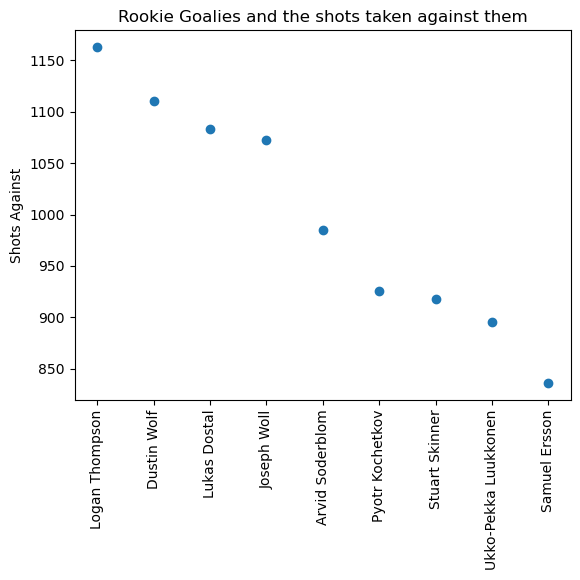

In [23]:
plt.scatter(RGP,RGSAT['Shots Against'])
plt.xticks(RGP,rotation=90)
plt.ylabel('Shots Against')
plt.title('Rookie Goalies and the shots taken against them')
plt.show

# Before moving on to other rookies I want to list my top five rookie goalies who I will consider for the Calder Memorial Trophy in conjunction with all other rookies.
# The list is as follows:
# 1) Dustin Wolf
# 2) Logan Thompson
# 3) Lukas Dostal
# 4) Pyotr Kochetkov
# 5) Joseph Woll

For the rest of the rookies I will initially pull all the data and filter them out by having a minimum CF value of 1100 and a minimum time on the ice of 1100 seconds. I'll then reorder the rookie skater on ice data by PDO and CF% values in descending order. Afterward I will scale the CF% by dividing them by 100 to get them on the same scale as the PDO values and plot them against each other.

,Player,EXR,RTOI
9,Jake Sanderson,142,1447.350000
32,Alex Vlasic,106,1444.850000
22,Jackson LaCombe,92,1104.983333
19,Owen Power,92,1304.666667
1,Wyatt Johnston,74,1147.883333
14,Fabian Zetterlund,72,1051.466667
30,Simon Edvinsson,71,1169.200000
40,Ryker Evans,57,1074.066667
16,Matty Beniers,56,1131.600000
0,Kirill Marchenko,53,1071.616667


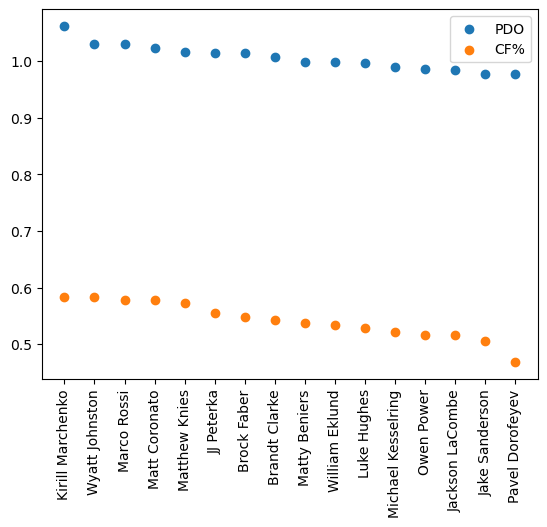

In [24]:
DFRSIT=pd.read_csv("RookieSkaterOnIce.csv")
DFRSOIS=pd.read_csv("RookieSkaterIndividual.csv")
DFRSITFilter=DFRSIT[DFRSIT['CF']>1100]
DFRSOISFilter=DFRSOIS[DFRSOIS['TOI']>1050]
PDOROrder=DFRSITFilter.sort_values(by=['PDO'],ascending=[0])
RCFOrder=PDOROrder.sort_values(by=['CF%'],ascending=[0])
PDORV=PDOROrder.loc[:,'PDO']
RCFV=RCFOrder.loc[:,'CF%']
RGOL=DFRSOISFilter.loc[:,'Goals']
RTAS=DFRSOISFilter.loc[:,'Total Assists']
RTAW=DFRSOISFilter.loc[:,'Takeaways']
RGAW=DFRSOISFilter.loc[:,'Giveaways']
RSB=DFRSOISFilter.loc[:,'Shots Blocked']
RTOI=DFRSOISFilter.loc[:,'TOI']
RPRS=PDOROrder.loc[:,'Player']
EXR=RGOL+RTAS+RTAW+RSB-RGAW
EXRRPRS=DFRSOISFilter.loc[:,'Player']
ORP=pd.DataFrame(DFRSOISFilter['Player'])
OP=pd.DataFrame(EXR)
pd.concat([EXR,ORP],ignore_index=[1])
ORP['EXR']=EXR
ORP['RTOI']=RTOI
NORP=ORP.sort_values(by=['EXR'],ascending=[0])
display(NORP)
RPS1=plt.scatter(RPRS,PDORV)
RPS2=plt.scatter(RPRS,RCFV/100)
plt.xticks(RPRS,rotation=90)
plt.legend([RPS1,RPS2],['PDO','CF%'])
plt.show()

I also worked to get goals,total assists, giveaways, takeaways, and shots blocked. I'll plot these against each other.

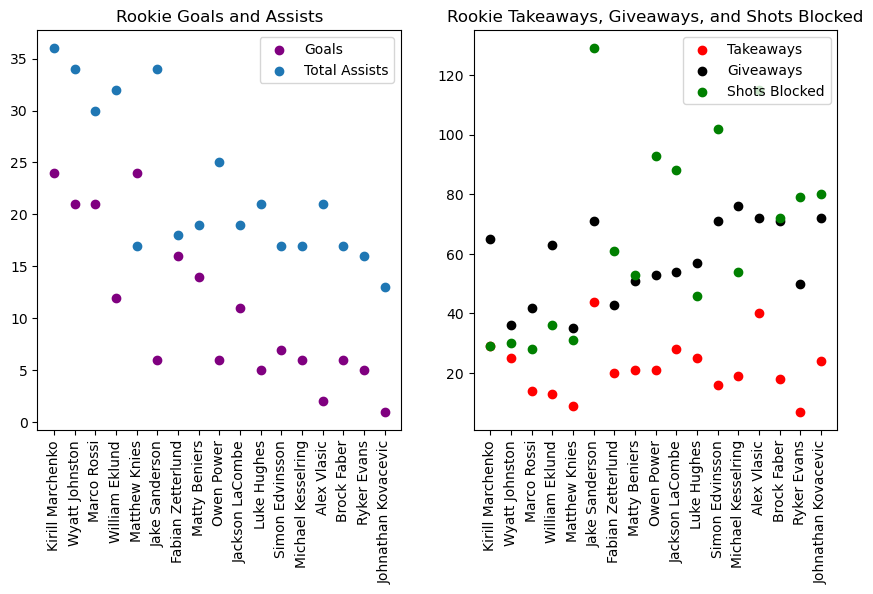

In [25]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
ax1.scatter(EXRRPRS,RGOL,color='purple')
ax1.scatter(EXRRPRS,RTAS)
ax1.legend(['Goals','Total Assists'])
ax1.title.set_text('Rookie Goals and Assists')

ax2.scatter(EXRRPRS,RTAW,color='red')
ax2.scatter(EXRRPRS,RGAW,color='black')
ax2.scatter(EXRRPRS,RSB,color='green')
ax2.title.set_text('Rookie Takeaways, Giveaways, and Shots Blocked')
ax2.legend(['Takeaways','Giveaways','Shots Blocked'])
plt.show()

Based on these scatter plots, tables, and my goalie picks I'm going to assemble my list for the Calder Memorial Trophy.

# My List for the Calder Memorial Trophy is as Follows:
# 1) Kirill Marchenko
# 2) Wyatt Johnston
# 3) Dustin Wolf
# 4) Marco Rossi
# 5) Logan Thompson

Next comes the Frank J Selke Trophy for the best overall defenseman in the league. This will include lefts and rights as well.

In [26]:
DFRSOIS=pd.read_csv("SkaterOnIcestats.csv",usecols=['Player','Position','GP','TOI','CF','CA','CF%','PDO'])
DFilter=DFRSOIS.sort_values(by=['Position'])
DP1=DFilter[DFilter['Position']=='D']
DP2=DFilter[DFilter['Position']=='L']
DP3=DFilter[DFilter['Position']=='R']
DPFilter=DP1[DP1['GP']>60]
DP2Filter=DP2[DP2['GP']>60]
DP3Filter=DP3[DP3['GP']>60]
TOIDFilter=DPFilter[DPFilter['TOI']>1300]
TOID2Filter=DP2Filter[DP2Filter['TOI']>900]
TOID3Filter=DP3Filter[DP3Filter['TOI']>550]
DCFOrder=TOIDFilter.sort_values(by=['CF%'],ascending=[0])
LCFOrder=TOID2Filter.sort_values(by=['CF%'],ascending=[0])
RCFOrder=TOID3Filter.sort_values(by=['CF%'],ascending=[0])
BD=DCFOrder.loc[:,'Player']
BDCF=DCFOrder.loc[:,'CF%']
BR=RCFOrder.loc[:,'Player']
BRCF=RCFOrder.loc[:,'CF%']
BL=LCFOrder.loc[:,'Player']
BLCF=LCFOrder.loc[:,'CF%']
BDD=pd.DataFrame(DCFOrder['Player'])
BDL=pd.DataFrame(LCFOrder['Player'])
BDR=pd.DataFrame(RCFOrder['Player'])
DCF=pd.DataFrame(DCFOrder['CF%'])
LCF=pd.DataFrame(LCFOrder['CF%'])
RCF=pd.DataFrame(RCFOrder['CF%'])
pd.concat([BDD,DCF],ignore_index=[1])
BDD['DCF']=DCF
NBDD=BDD.sort_values(by=['DCF'],ascending=0)
pd.concat([BDL,LCF],ignore_index=[1])
BDL['LCF']=LCF
NBDL=BDL.sort_values(by=['LCF'],ascending=0)
pd.concat([BDR,RCF],ignore_index=[1])
BDR['RCF']=RCF
NBDR=BDR.sort_values(by=['RCF'],ascending=0)
DPDOrder=TOIDFilter.sort_values(by=['PDO'],ascending=[0])
LPDOrder=TOID2Filter.sort_values(by=['PDO'],ascending=[0])
RPDOrder=TOID3Filter.sort_values(by=['PDO'],ascending=[0])
DDD=DPDOrder.loc[:,'Player']
DDP=DPDOrder.loc[:,'PDO']
RRR=RPDOrder.loc[:,'Player']
RRP=RPDOrder.loc[:,'PDO']
LLL=LPDOrder.loc[:,'Player']
LLP=LPDOrder.loc[:,'PDO']
DPDO=pd.DataFrame(DPDOrder['PDO'])
RPDO=pd.DataFrame(RPDOrder['PDO'])
LPDO=pd.DataFrame(LPDOrder['PDO'])
DPDOP=pd.DataFrame(DPDOrder['Player'])
RPDOP=pd.DataFrame(RPDOrder['Player'])
LPDOP=pd.DataFrame(LPDOrder['Player'])
pd.concat([DPDOP,DPDO],ignore_index=[1])
DPDOP['PDO']=DPDO
NDPDOP=DPDOP.sort_values(by=['PDO'],ascending=0)
pd.concat([RPDOP,RPDO],ignore_index=[1])
RPDOP['PDO']=RPDO
NRPDOP=RPDOP.sort_values(by=['PDO'],ascending=0)
pd.concat([LPDOP],ignore_index=[1])
LPDOP['PDO']=LPDO
NLPDOP=LPDOP.sort_values(by=['PDO'],ascending=0)
DCFTOI=pd.DataFrame(DCFOrder['TOI'])
RCFTOI=pd.DataFrame(RCFOrder['TOI'])
LCFTOI=pd.DataFrame(LCFOrder['TOI'])
pd.concat([NBDD,DCFTOI],ignore_index=[1])
NBDD['DCFTOI']=DCFTOI
pd.concat([NBDD,DCFTOI],ignore_index=[1])
NBDR['RCFTOI']=RCFTOI
pd.concat([NBDD,DCFTOI],ignore_index=[1])
NBDL['LCFTOI']=LCFTOI
DPDOTOI=pd.DataFrame(DPDOrder['TOI'])
RPDOTOI=pd.DataFrame(RPDOrder['TOI'])
LPDOTOI=pd.DataFrame(LPDOrder['TOI'])
pd.concat([DPDO,DPDOTOI],ignore_index=[1])
DPDO['DPDOTOI']=DPDOTOI
RPDO['RPDOTOI']=RPDOTOI
LPDO['LPDOTOI']=LPDOTOI
OKD=BDCF
OKR=BRCF
OKL=BLCF

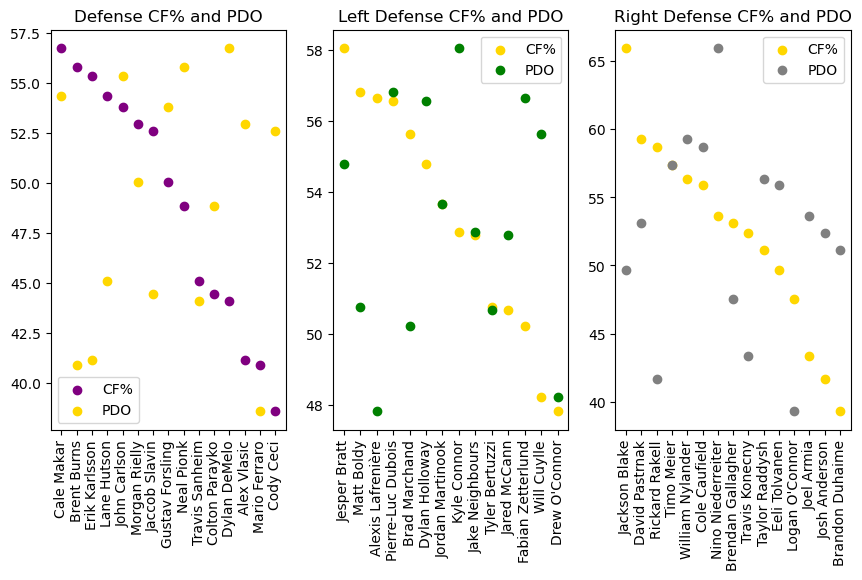

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
ax1.scatter(BD,BDCF,color='purple')
ax1.scatter(DDD,OKD,color='gold')
ax1.legend(['CF%','PDO'])
ax1.title.set_text('Defense CF% and PDO')

ax2.scatter(BL,BLCF,color='gold')
ax2.scatter(LLL,OKL,color='green')
ax2.title.set_text('Left Defense CF% and PDO')
ax2.legend(['CF%','PDO'])

ax3.scatter(BR,BRCF,color='gold')
ax3.scatter(RRR,OKR,color='grey')
ax3.title.set_text('Right Defense CF% and PDO')
ax3.legend(['CF%','PDO'])

plt.show()

I'm going to exclude time played from this analysis and nomination set because the scale of time on the ice between the different defensive player clusters is too large.

# My list for the Frank J Selke Trophy is as follows:
# 1) Cale Makar
# 2) Jackson Blake
# 3) Pierre-Luc Dubois
# 4) John Carlson
# 5) William Nylander

Next will be the Hart Memorial Trophy for the player dubbed most valuable to his team. For the sake of time this will solely be based off of previously generated visualizaitons.

The first visulization will be for the goalies. Something important to note is that the values in the visualizations will be different for the goalies since they lack a CF% and PDO value compared to offensive and defensive players.

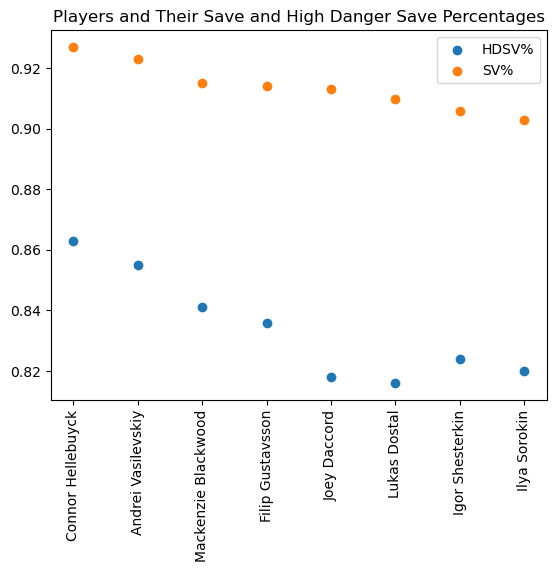

In [28]:
HDSVLL=SVFF.loc[:,'HDSV%']
SVFFL=SVFF.loc[:,'SV%']
GP=SVFF.loc[:,'Player']
P1=plt.scatter(GP,HDSVLL)
P2=plt.scatter(GP,SVFFL)
plt.xticks(GP,rotation=90)
plt.legend([P1,P2],['HDSV%','SV%'])
plt.title('Players and Their Save and High Danger Save Percentages')
plt.show()

Next will be the defensemen.

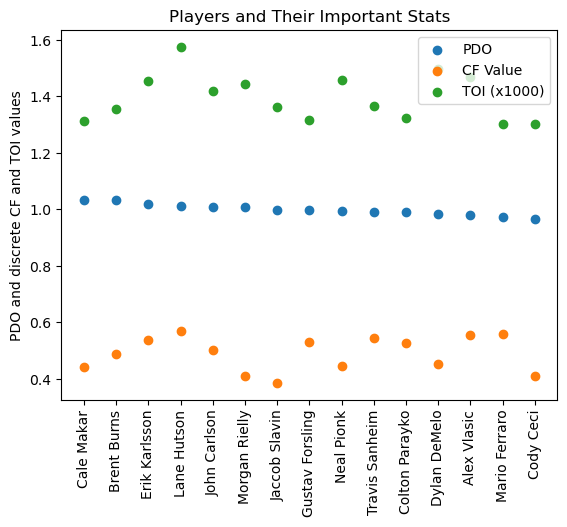

In [29]:
PD1=plt.scatter(DP,PDOD)
PD2=plt.scatter(DP,PDOrder['CF%']/100)
PD3=plt.scatter(DP,PDOrder['TOI']/1000)
plt.xticks(PDOrder['Player'],rotation=90)
plt.legend([PD1,PD2,PD3],['PDO','CF Value','TOI (x1000)'])
plt.ylabel('PDO and discrete CF and TOI values')
plt.title('Players and Their Important Stats')
plt.show()

Now come all the defensive players including the left and right defenders.

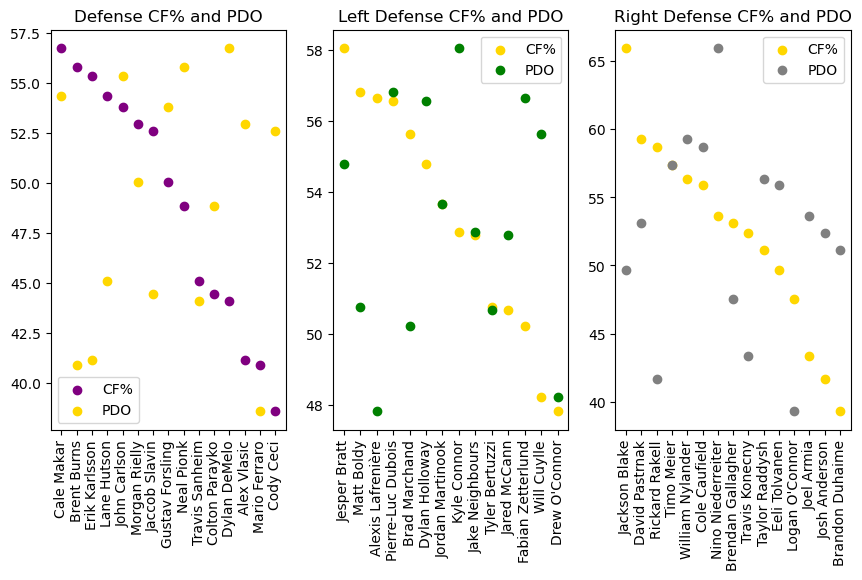

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
ax1.scatter(BD,BDCF,color='purple')
ax1.scatter(DDD,OKD,color='gold')
ax1.legend(['CF%','PDO'])
ax1.title.set_text('Defense CF% and PDO')

ax2.scatter(BL,BLCF,color='gold')
ax2.scatter(LLL,OKL,color='green')
ax2.title.set_text('Left Defense CF% and PDO')
ax2.legend(['CF%','PDO'])

ax3.scatter(BR,BRCF,color='gold')
ax3.scatter(RRR,OKR,color='grey')
ax3.title.set_text('Right Defense CF% and PDO')
ax3.legend(['CF%','PDO'])

plt.show()

Lastly, we'll bring the rookies into the ring since they too deserve to be considered for being the most valuable player potentially.

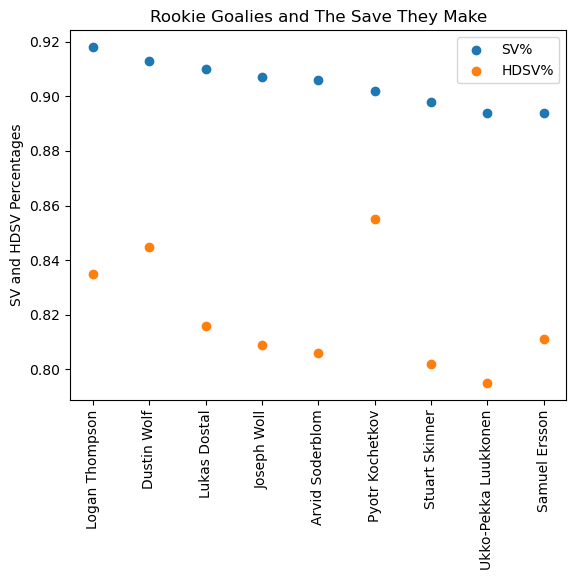

In [31]:
RGSV=DFRGFilter.loc[:,'SV%']
RGHDSV=DFRGFilter.loc[:,'HDSV%']
RGP=DFRGFilter.loc[:,'Player']
PRG1=plt.scatter(RGP,RGSV)
PRG2=plt.scatter(RGP,RGHDSV)
plt.legend([PRG1,PRG2],['SV%','HDSV%'])
plt.xticks(RGP,rotation=90)
plt.ylabel('SV and HDSV Percentages')
plt.title('Rookie Goalies and The Save They Make')
plt.show()

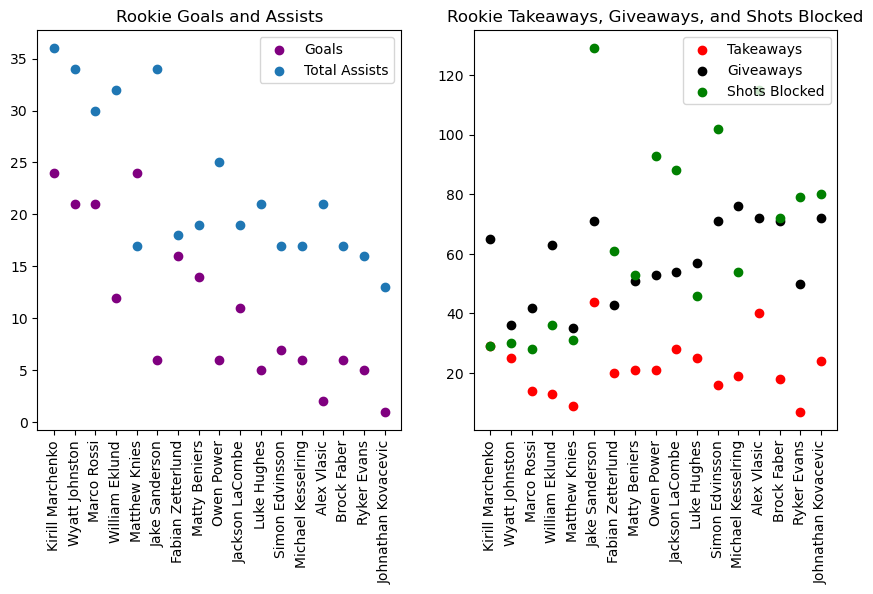

In [32]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
ax1.scatter(EXRRPRS,RGOL,color='purple')
ax1.scatter(EXRRPRS,RTAS)
ax1.legend(['Goals','Total Assists'])
ax1.title.set_text('Rookie Goals and Assists')

ax2.scatter(EXRRPRS,RTAW,color='red')
ax2.scatter(EXRRPRS,RGAW,color='black')
ax2.scatter(EXRRPRS,RSB,color='green')
ax2.title.set_text('Rookie Takeaways, Giveaways, and Shots Blocked')
ax2.legend(['Takeaways','Giveaways','Shots Blocked'])
plt.show()

Now that all of the previously generated visualiztions are here, it's time to get a new one added to the mix. Essentially it'll be just like the Rookie Goals and Assists set of visualizations but for the more seasoned skaters. TOI will be divided by 100 seconds to properly scale it and discreitze it so it can be more easily visualized.

In [33]:
DFSIT = pd.read_csv("SkaterOnIcestats.csv")
DFSITFilter=DFSIT[DFSIT['CF']>1550]
PDOSOrder=DFSITFilter.sort_values(by=['PDO'],ascending=[0])
SCFOrder=PDOSOrder.sort_values(by=['CF%'],ascending=[0])
PDOSV=PDOSOrder.loc[:,'PDO']
SCFV=SCFOrder.loc[:,'CF%']/100
SGOL=PDOSOrder.loc[:,'GF%']
STAS=DFSITFilter.loc[:,'FA']
STAHDG=DFSITFilter.loc[:,'HDGF%']
SGAW=DFSITFilter.loc[:,'GA']
SSB=DFSITFilter.loc[:,'On-Ice SV%']
STOI=DFSITFilter.loc[:,'TOI']/100
SPRS=PDOSOrder.loc[:,'Player']
EXSRPRS=DFSITFilter.loc[:,'Player']
OSP=pd.DataFrame(DFSITFilter['Player'])

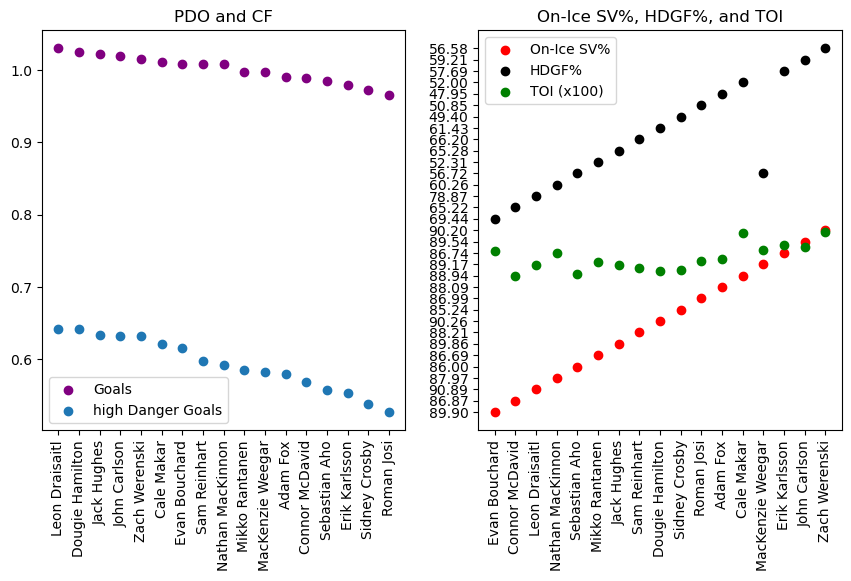

In [34]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
ax1.scatter(SPRS,PDOSV,color='purple')
ax1.scatter(SPRS,SCFV)
ax1.legend(['Goals','high Danger Goals'])
ax1.title.set_text('PDO and CF')

ax2.scatter(EXSRPRS,SSB,color='red')
ax2.scatter(EXSRPRS,STAHDG,color='black')
ax2.scatter(EXSRPRS,STOI,color='green')
ax2.title.set_text('On-Ice SV%, HDGF%, and TOI')
ax2.legend(['On-Ice SV%','HDGF%','TOI (x100)'])
plt.show()

# Now it comes time to make my picks for the Hart Memorial Trophy. The list is as follows:
# 1) Connor Hellbuyck
# 2) Zach Weresnki
# 3) Kirill Marchenko
# 4) Dustin Wolf
# 5) John Carlson

Lastly comes the Lady Byng trophy given to the athlete who displays the best sportsmanship and skills. Information related to skill is going to be pulled from the Hart Memorial Trophy visualizations above, but for sportsmanship the primary metrics being looked at will be penalties incurred by skaters.

In [35]:
RPEN=pd.read_csv("RookieSkaterIndividual.csv",usecols=['Player','TOI','PIM','Total Penalties','Minor','Major','Misconduct','Penalties Drawn'])
SPEN=pd.read_csv("SkaterIndividualstats.csv",usecols=['Player','TOI','PIM','Total Penalties','Minor','Major','Misconduct','Penalties Drawn'])
SPEN.sort_values(by=['Major'],ascending=[1])
SPENFilter=SPEN[SPEN['TOI']>1400]
display(SPENFilter)
SPPS=SPENFilter.loc[:,'Player']
SPIM=SPENFilter.loc[:,'PIM']
STP=SPENFilter.loc[:,'Total Penalties']
SMI=SPENFilter.loc[:,'Minor']
SMJ=SPENFilter.loc[:,'Major']
SMC=SPENFilter.loc[:,'Misconduct']
SPD=SPENFilter.loc[:,'Penalties Drawn']
SPENT=SPIM+STP+SMI+SMJ+SMC+SPD
SPENT1=pd.DataFrame(SPENT)
SPPS1=pd.DataFrame(SPPS)
AG=pd.concat([SPENT,SPPS],ignore_index=[1])
SPPS1['SPENT1']=SPENT1
SPPS1.sort_values(by=['SPENT1'],ascending=[1])

,Player,TOI,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn
15,Cale Makar,1574.800000,12,6,6,0,0,18
19,Zach Werenski,1586.366667,29,13,12,1,0,13
68,Josh Morrissey,1445.800000,22,11,11,0,0,11
81,Evan Bouchard,1414.666667,22,11,11,0,0,18
84,Erik Karlsson,1466.800000,18,9,9,0,0,7
112,Jake Sanderson,1447.350000,10,5,5,0,0,7
115,John Carlson,1452.316667,18,9,9,0,0,7
122,Mikhail Sergachev,1430.150000,20,10,10,0,0,5
139,Moritz Seider,1515.966667,30,15,15,0,0,12
150,Colton Parayko,1455.716667,8,4,4,0,0,5


,Player,SPENT1
150,Colton Parayko,21
264,Alex Vlasic,25
277,Gustav Forsling,26
112,Jake Sanderson,27
316,Vladislav Gavrikov,33
195,Devon Toews,39
15,Cale Makar,42
84,Erik Karlsson,43
115,John Carlson,43
267,Brock Faber,44


The players with the best sportmanship will have the lowest SPENT1 values above. The problem is that there are tons of them with a score of 0. I then sorted by TOI with a minimum TOI of 1500 required. From here I looked at more seasoned players who were in the above nominations. These include Cale Makar, Erik Karlsson, John Carlson, and Zach Werenski. Next will come the rookies.

In [36]:
RPENFilter=RPEN[RPEN['TOI']>1000]
display(RPENFilter)
RPPS=RPENFilter.loc[:,'Player']
RPIM=RPENFilter.loc[:,'PIM']
RTP=RPENFilter.loc[:,'Total Penalties']
RMI=RPENFilter.loc[:,'Minor']
RMJ=RPENFilter.loc[:,'Major']
RMC=RPENFilter.loc[:,'Misconduct']
RPD=RPENFilter.loc[:,'Penalties Drawn']
RPENT=RPIM+RTP+RMI+RMJ+RMC+RPD
RPENT1=pd.DataFrame(RPENT)
RPPS1=pd.DataFrame(RPPS)
RG=pd.concat([RPENT,RPPS],ignore_index=[1])
RPPS1['RPENT1']=RPENT1
RPPS1.sort_values(by=['RPENT1'],ascending=[1])

,Player,TOI,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn
0,Kirill Marchenko,1071.616667,14,7,7,0,0,13
1,Wyatt Johnston,1147.883333,12,6,6,0,0,10
2,Marco Rossi,1117.233333,24,12,12,0,0,16
3,JJ Peterka,1029.950000,24,8,7,0,1,11
5,Dylan Holloway,1031.983333,10,5,5,0,0,8
6,William Eklund,1115.200000,22,7,6,0,1,14
8,Matthew Knies,1051.133333,26,13,13,0,0,14
9,Jake Sanderson,1447.350000,10,5,5,0,0,7
14,Fabian Zetterlund,1051.466667,10,5,5,0,0,17
16,Matty Beniers,1131.600000,12,6,6,0,0,17


,Player,RPENT1
32,Alex Vlasic,25
9,Jake Sanderson,27
5,Dylan Holloway,28
19,Owen Power,30
27,Luke Hughes,33
1,Wyatt Johnston,34
43,Jordan Spence,34
14,Fabian Zetterlund,37
22,Jackson LaCombe,40
0,Kirill Marchenko,41


In [38]:
Cale=42
Erik=43
John=43
Zach=68
Alex=25
Wyatt=34
Kirill=41

Some names seen previously include Alex Vlasic, Wyatt Johnston, and Kirill Marchenko. Next comes time to compare these players specifically. Interestingly enough the rookies have lower incursion scores which is the sum of major and minor penalties, penalties drawn, PIM, total penalties, and misconduct.

# My list for the Lady Byng Trophy is as follows:
# 1) Cale Makar
# 2) Kirill Marchenko
# 3) Alex Vlasic
# 4) Erik Karlsson
# 5) John Carlson